In [1]:
import os
import sys

notebook_dir = os.getcwd()
app_path = os.path.abspath(os.path.join(notebook_dir, "../"))
if app_path not in sys.path:
    sys.path.insert(0, app_path)

In [2]:
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

True

## 노드 정의

In [3]:
import os
from graphparser.state import GraphState
import graphparser.core as parser_core
import graphparser.pdf as pdf


# 문서 분할
split_pdf_node = pdf.SplitPDFFilesNode(batch_size=10)

# Layout Analyzer
layout_analyze_node = parser_core.LayoutAnalyzerNode(os.environ.get("UPSTAGE_API_KEY"))

# 페이지 요소 추출
page_element_extractor_node = parser_core.ExtractPageElementsNode()

# 이미지 자르기
image_cropper_node = parser_core.ImageCropperNode()

# 테이블 자르기
table_cropper_node = parser_core.TableCropperNode()

# 페이지별 텍스트 추출
extract_page_text = parser_core.ExtractPageTextNode()

# 페이지별 요약
page_summary_node = parser_core.CreatePageSummaryNode(
    api_key=os.environ.get("OPENAI_API_KEY")
)

# 이미지 요약
image_summary_node = parser_core.CreateImageSummaryNode(
    api_key=os.environ.get("OPENAI_API_KEY")
)

# 테이블 요약
table_summary_node = parser_core.CreateTableSummaryNode(
    api_key=os.environ.get("OPENAI_API_KEY")
)

# 테이블 Markdown 추출
table_markdown_extractor = parser_core.TableMarkdownExtractorNode()

## 그래프 정의

In [4]:
from langgraph.graph import END, StateGraph
from langgraph.checkpoint.memory import MemorySaver

# LangGraph을 생성
workflow = StateGraph(GraphState)

# 노드들을 정의합니다.
workflow.add_node("split_pdf_node", split_pdf_node)
workflow.add_node("layout_analyzer_node", layout_analyze_node)
workflow.add_node("page_element_extractor_node", page_element_extractor_node)
workflow.add_node("image_cropper_node", image_cropper_node)
workflow.add_node("table_cropper_node", table_cropper_node)
workflow.add_node("extract_page_text_node", extract_page_text)
workflow.add_node("page_summary_node", page_summary_node)
workflow.add_node("image_summary_node", image_summary_node)
workflow.add_node("table_summary_node", table_summary_node)
workflow.add_node("table_markdown_node", table_markdown_extractor)

# 각 노드들을 연결합니다.
workflow.add_edge("split_pdf_node", "layout_analyzer_node")
workflow.add_edge("layout_analyzer_node", "page_element_extractor_node")
workflow.add_edge("page_element_extractor_node", "image_cropper_node")
workflow.add_edge("page_element_extractor_node", "table_cropper_node")
workflow.add_edge("page_element_extractor_node", "extract_page_text_node")
workflow.add_edge("image_cropper_node", "page_summary_node")
workflow.add_edge("table_cropper_node", "page_summary_node")
workflow.add_edge("extract_page_text_node", "page_summary_node")
workflow.add_edge("page_summary_node", "image_summary_node")
workflow.add_edge("page_summary_node", "table_summary_node")
workflow.add_edge("image_summary_node", END)
workflow.add_edge("table_summary_node", "table_markdown_node")
workflow.add_edge("table_markdown_node", END)

workflow.set_entry_point("split_pdf_node")

memory = MemorySaver()
app = workflow.compile(checkpointer=memory)

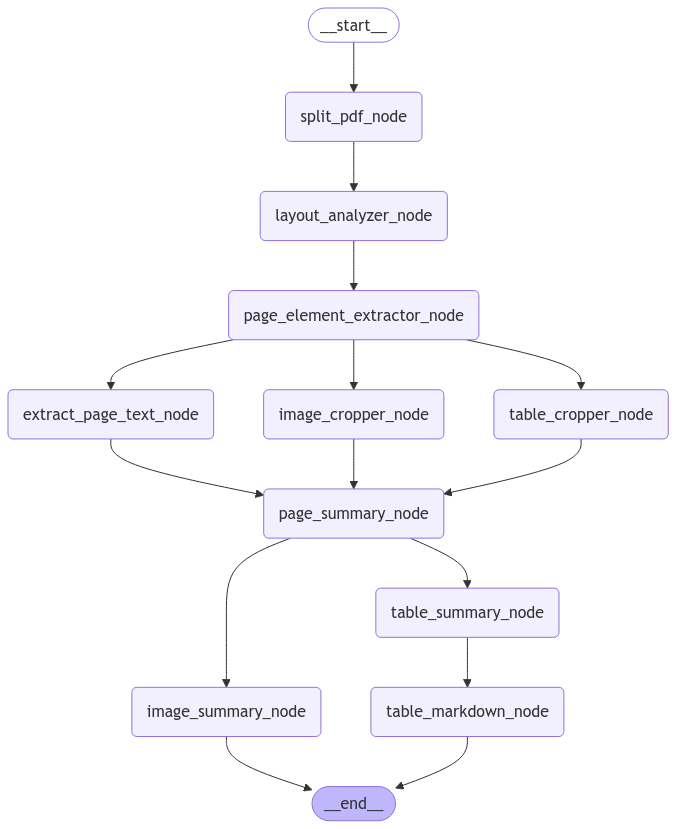

In [5]:
from IPython.display import Image, display

try:
    display(
        Image(app.get_graph(xray=True).draw_mermaid_png())
    )  # 실행 가능한 객체의 그래프를 mermaid 형식의 PNG로 그려서 표시합니다. xray=True는 추가적인 세부 정보를 포함합니다.
except:
    # 이 부분은 추가적인 의존성이 필요하며 선택적으로 실행됩니다.
    pass

아래의 링크에서 데이터를 다운로드 받습니다.
- [샘플 데이터 링크](https://www.innovation.go.kr/ucms/bbs/B0000051/view.do?nttId=3801&menuNo=300145&searchType=&pageIndex=&searchType=)

In [6]:
### 설정 파라미터 ###
FILEPATH = (
    "/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서.pdf"
)
LANGUAGE = "Korean"
### 설정 파라미터 ###

In [7]:
import pprint
from langgraph.errors import GraphRecursionError
from langchain_core.runnables import RunnableConfig

config = RunnableConfig(
    recursion_limit=100, configurable={"thread_id": "research-paper"}
)

# AgentState 객체를 활용하여 질문을 입력합니다.
inputs = GraphState(filepath=FILEPATH, language=LANGUAGE)

# app.stream을 통해 입력된 메시지에 대한 출력을 스트리밍합니다.
try:
    for output in app.stream(inputs, config=config):
        # 출력된 결과에서 키와 값을 순회합니다.
        for key, value in output.items():
            # 노드의 이름과 해당 노드에서 나온 출력을 출력합니다.
            pprint.pprint(f"Output from node '{key}':")
            pprint.pprint("---")
            # 출력 값을 예쁘게 출력합니다.
            pprint.pprint(value, indent=2, width=80, depth=None)
        # 각 출력 사이에 구분선을 추가합니다.
        pprint.pprint("\n---\n")
except GraphRecursionError as e:
    pprint.pprint(f"Recursion limit reached: {e}")

총 페이지 수: 14
분할 PDF 생성: /Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서_0000_0009.pdf
분할 PDF 생성: /Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서_0010_0013.pdf
"Output from node 'split_pdf_node':"
'---'
{ 'split_filepaths': [ '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서_0000_0009.pdf',
                       '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서_0010_0013.pdf']}
'\n---\n'
"Output from node 'layout_analyzer_node':"
'---'
{ 'analyzed_files': [ '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서_0000_0009.json',
                      '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서_0010_0013.json']}
'\n---\n'
("data: {'api': '2.0', 'content': {'html': '<table id=\\'0\\' "
 "style=\\'font-size:16px\\'><tr><td>ELIM</td><td>2024</td></tr><tr><td>A-정기</td><td>05-31</td></tr></table>\\n<h1 "
 "id=\\'1\\' style=\\'font-size:20px\\'>【 지곡초등학교 교사동 】<br>정 기 안 전 점 검 보 고 "
 '서</h1>\\n<figure id=\\\'2\\\'><img alt="" data-coor

In [8]:
state = app.get_state(config).values

In [9]:
state

{'filepath': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서.pdf',
 'page_numbers': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 'split_filepaths': ['/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서_0000_0009.pdf',
  '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서_0010_0013.pdf'],
 'analyzed_files': ['/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서_0000_0009.json',
  '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서_0010_0013.json'],
 'page_elements': {0: {'image_elements': [{'category': 'figure',
     'content': {'html': '<figure id=\'2\'><img alt="" data-coord="top-left:(293,663); bottom-right:(944,1159)" /></figure>',
      'markdown': '![image](/image/placeholder)\n',
      'text': ''},
     'coordinates': [{'x': 0.2369, 'y': 0.3783},
      {'x': 0.7618, 'y': 0.3783},
      {'x': 0.7618, 'y': 0.6612},
      {'x': 0.2369, 'y': 0.6612}],
     'id': 2,
     'page': 0}],
   'table_elements': [{'category': 'table',
     'content

## 저장 및 불러오기

In [10]:
from graphparser.layout_utils import save_state, load_state

# 상태 저장
save_state(state, FILEPATH)

# 상태 불러오기
loaded_state = load_state(FILEPATH)
loaded_state

{'filepath': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서.pdf',
 'page_numbers': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 'split_filepaths': ['/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서_0000_0009.pdf',
  '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서_0010_0013.pdf'],
 'analyzed_files': ['/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서_0000_0009.json',
  '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서_0010_0013.json'],
 'page_elements': {0: {'image_elements': [{'category': 'figure',
     'content': {'html': '<figure id=\'2\'><img alt="" data-coord="top-left:(293,663); bottom-right:(944,1159)" /></figure>',
      'markdown': '![image](/image/placeholder)\n',
      'text': ''},
     'coordinates': [{'x': 0.2369, 'y': 0.3783},
      {'x': 0.7618, 'y': 0.3783},
      {'x': 0.7618, 'y': 0.6612},
      {'x': 0.2369, 'y': 0.6612}],
     'id': 2,
     'page': 0}],
   'table_elements': [{'category': 'table',
     'content

In [11]:
state = loaded_state

In [12]:
state["image_summary"]

{2: '<image>\n<title>\n지곡초등학교 교사동 안전진단 보고서\n</title>\n<summary>\n이 이미지는 지곡초등학교 교사동의 외관을 보여주고 있으며, 안전진단 보고서와 관련된 정보가 포함되어 있습니다. 작성일은 2024년 5월이며, 국토교통부에 의해 지정된 안전진단 전문기관의 보고서입니다. 또한, 경기지방중소벤처기업청장에 의해 지정된 기업이 수행한 진단입니다.\n</summary>\n<entities> \n- 지곡초등학교\n- 교사동\n- 안전진단 보고서\n- 작성일: 2024년 5월\n- 국토교통부\n- 경기 제217호\n- 안전진단 전문기관\n- 경기지방중소벤처기업청장 지정 기업\n- 전문, 과학 및 기술 서비스업\n</entities>\n<hypothetical_questions>\n1. 지곡초등학교의 안전진단 결과는 어땠나요?\n2. 안전진단 전문기관은 어떤 기준으로 선정되나요?\n3. 교사동의 안전진단은 얼마나 자주 이루어지나요?\n4. 안전진단 보고서의 주요 내용은 무엇인가요?\n5. 경기지방중소벤처기업청장 지정 기업의 역할은 무엇인가요?\n</hypothetical_questions>\n</image>',
 16: '<image>\n<title>\n안전진단전문기관 등록증\n</title>\n<summary>\n이 문서는 엘림주식회사가 안전진단전문기관으로 등록되었음을 나타내는 등록증입니다. 등록일자는 2017년 9월 15일이며, 안전진단 관련 법률에 따라 등록되었습니다. \n</summary>\n<entities> \n- 기관명: 엘림주식회사\n- 대표자: 김순영\n- 사무소 소재지: 경기도 수원시 영통구 광교중앙로 266번길 30, 6층\n- 등록 분야: 교량 및 터널, 건축\n- 등록일: 2017년 9월 15일\n- 발급일: 2023년 2월 27일\n</entities>\n<hypothetical_questions>\n1. 엘림주식회사는 어떤 분야에서 안전진단을 수행하나요?\n2. 이 등록증의 발급일자는 언제인가요?\n3

## Markdown 생성

In [13]:
# print(state["image_summary"][24])

In [14]:
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter
import re


def extract_tag_content(content, tag):
    pattern = rf"<{tag}>(.*?)</{tag}>"
    match = re.search(pattern, content, re.DOTALL)

    if match:
        return match.group(1).strip()
    else:
        return None


def extract_non_tag_content(content, tag):
    pattern = rf"<{tag}>.*?</{tag}>"
    result = re.sub(pattern, "", content, flags=re.DOTALL)
    return result.strip()

### Image, Table 에서 추출된 데이터 Vector DB 생성을 위한 문서 생성

- Title, Summary, Entities 는 임베딩 검색에 걸리기 위한 문서로 생성
- hypothetical_questions 는 임베딩 검색에 걸리기 위한 문서로 생성

In [15]:
for i in state["image_summary"]:
    print(
        state["image_summary"][i],
        end="\n=============================================================================================================================================================\n",
    )

<image>
<title>
지곡초등학교 교사동 안전진단 보고서
</title>
<summary>
이 이미지는 지곡초등학교 교사동의 외관을 보여주고 있으며, 안전진단 보고서와 관련된 정보가 포함되어 있습니다. 작성일은 2024년 5월이며, 국토교통부에 의해 지정된 안전진단 전문기관의 보고서입니다. 또한, 경기지방중소벤처기업청장에 의해 지정된 기업이 수행한 진단입니다.
</summary>
<entities> 
- 지곡초등학교
- 교사동
- 안전진단 보고서
- 작성일: 2024년 5월
- 국토교통부
- 경기 제217호
- 안전진단 전문기관
- 경기지방중소벤처기업청장 지정 기업
- 전문, 과학 및 기술 서비스업
</entities>
<hypothetical_questions>
1. 지곡초등학교의 안전진단 결과는 어땠나요?
2. 안전진단 전문기관은 어떤 기준으로 선정되나요?
3. 교사동의 안전진단은 얼마나 자주 이루어지나요?
4. 안전진단 보고서의 주요 내용은 무엇인가요?
5. 경기지방중소벤처기업청장 지정 기업의 역할은 무엇인가요?
</hypothetical_questions>
</image>
<image>
<title>
안전진단전문기관 등록증
</title>
<summary>
이 문서는 엘림주식회사가 안전진단전문기관으로 등록되었음을 나타내는 등록증입니다. 등록일자는 2017년 9월 15일이며, 안전진단 관련 법률에 따라 등록되었습니다. 
</summary>
<entities> 
- 기관명: 엘림주식회사
- 대표자: 김순영
- 사무소 소재지: 경기도 수원시 영통구 광교중앙로 266번길 30, 6층
- 등록 분야: 교량 및 터널, 건축
- 등록일: 2017년 9월 15일
- 발급일: 2023년 2월 27일
</entities>
<hypothetical_questions>
1. 엘림주식회사는 어떤 분야에서 안전진단을 수행하나요?
2. 이 등록증의 발급일자는 언제인가요?
3. 안전진단전문기관으로 등록되기 위한 조건은 무엇인가요?
4. 등록증에 기재된 사무소의 주소는 어디인

In [16]:
# print(extract_tag_content(state["image_summary"][24], "hypothetical_questions"))

In [17]:
# print(extract_non_tag_content(state["image_summary"][24], "hypothetical_questions"))

### Table

In [18]:
state["table_summary"]

{0: '<table>\n<title>\n지곡초등학교 교사동 안전진단 보고서\n</title>\n<summary>\n이 보고서는 지곡초등학교 교사동의 안전진단 결과를 요약한 것입니다. 2024년 5월 31일에 A-정기 안전진단이 실시되었습니다.\n</summary>\n<entities> \n- ELIM: A-정기\n- 연도: 2024\n- 날짜: 05-31\n</entities>\n<data_insights>\n- 안전진단의 주기는 A-정기로 설정되어 있으며, 2024년 5월 31일에 실시됩니다.\n</data_insights>\n<hypothetical_questions>\n1. A-정기 안전진단의 목적은 무엇인가요?\n2. 안전진단 결과는 어떻게 보고되나요?\n3. 지곡초등학교의 안전진단 주기는 얼마나 되나요?\n4. 안전진단 전문기관의 역할은 무엇인가요?\n5. 경기 제217호의 의미는 무엇인가요?\n</hypothetical_questions>\n</table>',
 20: '<table>\n<title>\n지곡초등학교 교사동 2024년 상반기 제3종 시설물 정기안전점검\n</title>\n<summary>\n이 문서는 지곡초등학교 교사동의 2024년 상반기 제3종 시설물 정기안전점검에 대한 일반현황을 정리한 것입니다. 점검 기간은 2024년 4월 18일부터 5월 31일까지이며, 시설물은 준공 후 15년이 경과된 건축물로, 안전등급은 B등급(상태점수 8.14)입니다.\n</summary>\n<entities> \n- 용역명: 지곡초등학교 교사동 2024년 상반기 제3종 시설물 정기안전점검\n- 점검기간: 2024. 04. 18. ∼ 2024. 05. 31.\n- 관리주체명: 지곡초등학교 교사동\n- 공동수급: 독자수행 100%\n- 계약방법: 수의계약\n- 시설물 종류: 준공 후 15년이 경과된 건축물\n- 준공일: 2004. 11. 01\n- 점검금액: 2,250천원 (부가세 포함)\n- 안전등급: B등급 (상태점수 8.14)\n- 시설물위치: 경기도

In [19]:
# XML 파싱을 위해 import 문을 추가합니다
import xml.etree.ElementTree as ET


def convert_to_markdown_table(table_summary):
    html = "<table>\n"

    # table_summary가 문자열인 경우를 처리합니다
    if isinstance(table_summary, str):
        # XML 파싱을 사용하여 문자열에서 데이터를 추출합니다
        root = ET.fromstring(table_summary)
        for child in root:
            html += f"  <tr>\n    <th>{child.tag}</th>\n    <td>"

            if child.tag in ["entities", "data_insights"]:
                html += "<ul>\n"
                for item in child.text.strip().split("\n- "):
                    if item.strip():
                        html += f"      <li>{item.strip()}</li>\n"
                html += "    </ul>"
            elif child.tag == "hypothetical_questions":
                html += "<ol>\n"
                for item in child.text.strip().split("\n"):
                    if item.strip():
                        html += f"      <li>{item.strip()}</li>\n"
                html += "    </ol>"
            else:
                html += child.text.strip()

            html += "</td>\n  </tr>\n"
    else:
        # 기존의 딕셔너리 처리 로직을 유지합니다
        for key, value in table_summary.items():
            html += f"  <tr>\n    <th>{key}</th>\n    <td>"

            if key in ["entities", "data_insights"]:
                html += "<ul>\n"
                for item in value.split("\n- "):
                    if item.strip():
                        html += f"      <li>{item.strip()}</li>\n"
                html += "    </ul>"
            elif key == "hypothetical_questions":
                html += "<ol>\n"
                for item in value.split("\n"):
                    if item.strip():
                        html += f"      <li>{item.strip()}</li>\n"
                html += "    </ol>"
            else:
                html += value

            html += "</td>\n  </tr>\n"

    html += "</table>"
    return html

In [20]:
# print(state["table_summary"][31])

In [21]:
# markdown_table = convert_to_markdown_table(state["table_summary"][31])
# print(markdown_table)

In [22]:
state

{'filepath': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서.pdf',
 'page_numbers': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 'split_filepaths': ['/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서_0000_0009.pdf',
  '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서_0010_0013.pdf'],
 'analyzed_files': ['/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서_0000_0009.json',
  '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서_0010_0013.json'],
 'page_elements': {0: {'image_elements': [{'category': 'figure',
     'content': {'html': '<figure id=\'2\'><img alt="" data-coord="top-left:(293,663); bottom-right:(944,1159)" /></figure>',
      'markdown': '![image](/image/placeholder)\n',
      'text': ''},
     'coordinates': [{'x': 0.2369, 'y': 0.3783},
      {'x': 0.7618, 'y': 0.3783},
      {'x': 0.7618, 'y': 0.6612},
      {'x': 0.2369, 'y': 0.6612}],
     'id': 2,
     'page': 0}],
   'table_elements': [{'category': 'table',
     'content

In [23]:
state["table_summary"]

{0: '<table>\n<title>\n지곡초등학교 교사동 안전진단 보고서\n</title>\n<summary>\n이 보고서는 지곡초등학교 교사동의 안전진단 결과를 요약한 것입니다. 2024년 5월 31일에 A-정기 안전진단이 실시되었습니다.\n</summary>\n<entities> \n- ELIM: A-정기\n- 연도: 2024\n- 날짜: 05-31\n</entities>\n<data_insights>\n- 안전진단의 주기는 A-정기로 설정되어 있으며, 2024년 5월 31일에 실시됩니다.\n</data_insights>\n<hypothetical_questions>\n1. A-정기 안전진단의 목적은 무엇인가요?\n2. 안전진단 결과는 어떻게 보고되나요?\n3. 지곡초등학교의 안전진단 주기는 얼마나 되나요?\n4. 안전진단 전문기관의 역할은 무엇인가요?\n5. 경기 제217호의 의미는 무엇인가요?\n</hypothetical_questions>\n</table>',
 20: '<table>\n<title>\n지곡초등학교 교사동 2024년 상반기 제3종 시설물 정기안전점검\n</title>\n<summary>\n이 문서는 지곡초등학교 교사동의 2024년 상반기 제3종 시설물 정기안전점검에 대한 일반현황을 정리한 것입니다. 점검 기간은 2024년 4월 18일부터 5월 31일까지이며, 시설물은 준공 후 15년이 경과된 건축물로, 안전등급은 B등급(상태점수 8.14)입니다.\n</summary>\n<entities> \n- 용역명: 지곡초등학교 교사동 2024년 상반기 제3종 시설물 정기안전점검\n- 점검기간: 2024. 04. 18. ∼ 2024. 05. 31.\n- 관리주체명: 지곡초등학교 교사동\n- 공동수급: 독자수행 100%\n- 계약방법: 수의계약\n- 시설물 종류: 준공 후 15년이 경과된 건축물\n- 준공일: 2004. 11. 01\n- 점검금액: 2,250천원 (부가세 포함)\n- 안전등급: B등급 (상태점수 8.14)\n- 시설물위치: 경기도

In [24]:
def create_document(content, metadata):
    """
    문서 객체를 생성합니다.

    Args:
        content (str): 문서의 내용
        metadata (dict): 문서의 메타데이터

    Returns:
        Document: 생성된 문서 객체
    """
    return Document(page_content=content, metadata=metadata)


def process_image_element(element, state, page_number):
    """
    이미지 요소를 처리합니다.

    Args:
        element (dict): 이미지 요소 정보
        state (dict): 현재 상태
        page_number (str): 페이지 번호

    Returns:
        tuple: 마크다운 문자열과 문서 객체 리스트
    """
    image_id = element["id"]
    image_summary = state["image_summary"][image_id]
    image_path = state["images"][image_id]
    image_path_md = f"![{image_path}]({image_path})"

    # image_summary_md = convert_to_markdown_table(image_summary)
    markdown = f"{image_path_md}"

    image_summary_clean = extract_non_tag_content(
        image_summary, "hypothetical_questions"
    )

    docs = [
        create_document(
            image_summary_clean,
            {
                "type": "image",
                "image": image_path,
                "page": page_number,
                "source": state["filepath"],
                "id": image_id,
            },
        )
    ]

    hypo_docs = []

    hypothetical_questions = extract_tag_content(
        image_summary, "hypothetical_questions"
    )
    if hypothetical_questions != None:
        hypo_docs.append(
            create_document(
                hypothetical_questions,
                {
                    "type": "hypothetical_questions",
                    "image": image_path,
                    "summary": image_summary_clean,
                    "page": page_number,
                    "source": state["filepath"],
                    "id": image_id,
                },
            )
        )

    return markdown, docs, hypo_docs


def process_table_element(element, state, page_number):
    """
    테이블 요소를 처리합니다.

    Args:
        element (dict): 테이블 요소 정보
        state (dict): 현재 상태
        page_number (str): 페이지 번호

    Returns:
        tuple: 마크다운 문자열과 문서 객체
    """
    table_id = element["id"]
    table_summary = state["table_summary"][table_id]
    table_markdown = state["table_markdown"][table_id]
    table_path = state["tables"][table_id]
    table_path_md = f"![{table_path}]({table_path})"

    # table_summary_md = convert_to_markdown_table(table_summary)
    markdown = f"{table_path_md}\n{table_markdown}"

    table_summary_clean = extract_non_tag_content(
        table_summary, "hypothetical_questions"
    )

    docs = [
        create_document(
            table_summary_clean,
            {
                "type": "table",
                "table": table_path,
                "markdown": table_markdown,
                "page": page_number,
                "source": state["filepath"],
                "id": table_id,
            },
        )
    ]

    hypo_docs = []

    hypothetical_questions = extract_tag_content(
        table_summary, "hypothetical_questions"
    )
    if hypothetical_questions != None:
        hypo_docs.append(
            create_document(
                hypothetical_questions,
                {
                    "type": "hypothetical_questions",
                    "table": table_path,
                    "summary": table_summary_clean,
                    "markdown": table_markdown,
                    "page": page_number,
                    "source": state["filepath"],
                    "id": table_id,
                },
            )
        )

    return markdown, docs, hypo_docs


def process_text_element(element):
    """
    텍스트 요소를 처리합니다.

    Args:
        element (dict): 텍스트 요소 정보

    Returns:
        str: 텍스트 내용
    """
    return element["content"]["html"]


def process_page(page, state, page_number, text_splitter):
    """
    페이지를 처리합니다.

    Args:
        page (dict): 페이지 정보
        state (dict): 현재 상태
        page_number (str): 페이지 번호
        text_splitter (RecursiveCharacterTextSplitter): 텍스트 분할기

    Returns:
        tuple: 마크다운 문자열 리스트와 문서 객체 리스트
    """
    markdowns = []
    docs = []
    hypo_docs = []
    page_texts = []

    for element in page["elements"]:
        if element["category"] == "figure":
            markdown, element_docs, hypo_doc = process_image_element(
                element, state, page_number
            )
            markdowns.append(markdown)
            docs.extend(element_docs)
            hypo_docs.extend(hypo_doc)
        elif element["category"] == "table":
            markdown, element_docs, hypo_doc = process_table_element(
                element, state, page_number
            )
            markdowns.append(markdown)
            docs.extend(element_docs)
            hypo_docs.extend(hypo_doc)
        else:
            text = process_text_element(element)
            markdowns.append(text)
            page_texts.append(text)

    page_text = "\n".join(page_texts)
    split_texts = text_splitter.split_text(page_text)

    text_summary = state["text_summary"][page_number]

    docs.append(
        create_document(
            text_summary,
            metadata={
                "type": "page_summary",
                "page": page_number,
                "source": state["filepath"],
                "text": page_text,
            },
        )
    )

    for text in split_texts:
        docs.append(
            create_document(
                text,
                metadata={
                    "type": "text",
                    "page": page_number,
                    "source": state["filepath"],
                    "summary": text_summary,
                },
            )
        )

    return markdowns, docs, hypo_docs


def process_document(state):
    """
    전체 문서를 처리합니다.

    Args:
        state (dict): 현재 상태

    Returns:
        tuple: 마크다운 문자열 리스트와 문서 객체 리스트
    """
    markdowns = []
    docs = []
    hypo_docs = []
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=50)

    for page_number, page in state["page_elements"].items():
        page_markdowns, page_docs, page_hypo_docs = process_page(
            page, state, page_number, text_splitter
        )
        markdowns.extend(page_markdowns)
        docs.extend(page_docs)
        hypo_docs.extend(page_hypo_docs)

    return markdowns, docs, hypo_docs


markdowns, docs, hypo_docs = process_document(state)

In [25]:
# Markdown 파일로 텍스트 저장
with open(FILEPATH.replace(".pdf", ".md"), "w", encoding="utf-8") as f:
    f.write("\n\n".join(markdowns))

print(f"텍스트가 '{FILEPATH.replace('.pdf', '.md')}' 파일로 저장되었습니다.")

텍스트가 '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서.md' 파일로 저장되었습니다.


In [26]:
len(docs)

59

In [27]:
docs

[Document(metadata={'type': 'table', 'table': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서/0.png', 'markdown': '| ELIM | 2024 |\n| --- | --- |\n| A-정기 | 05-31 |', 'page': 0, 'source': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서.pdf', 'id': 0}, page_content='<table>\n<title>\n지곡초등학교 교사동 안전진단 보고서\n</title>\n<summary>\n이 보고서는 지곡초등학교 교사동의 안전진단 결과를 요약한 것입니다. 2024년 5월 31일에 A-정기 안전진단이 실시되었습니다.\n</summary>\n<entities> \n- ELIM: A-정기\n- 연도: 2024\n- 날짜: 05-31\n</entities>\n<data_insights>\n- 안전진단의 주기는 A-정기로 설정되어 있으며, 2024년 5월 31일에 실시됩니다.\n</data_insights>\n\n</table>'),
 Document(metadata={'type': 'image', 'image': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서/2.png', 'page': 0, 'source': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서.pdf', 'id': 2}, page_content='<image>\n<title>\n지곡초등학교 교사동 안전진단 보고서\n</title>\n<summary>\n이 이미지는 지곡초등학교 교사동의 외관을 보여주고 있으며, 안전진단 보고서와 관련된 정보가 포함되어 있습니다. 작성일은 2024년 5월이며, 국토교통부에 의해 지정된 안전진단 전문기관의 보고서입니다. 또한, 경

In [28]:
hypo_docs

[Document(metadata={'type': 'hypothetical_questions', 'table': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서/0.png', 'summary': '<table>\n<title>\n지곡초등학교 교사동 안전진단 보고서\n</title>\n<summary>\n이 보고서는 지곡초등학교 교사동의 안전진단 결과를 요약한 것입니다. 2024년 5월 31일에 A-정기 안전진단이 실시되었습니다.\n</summary>\n<entities> \n- ELIM: A-정기\n- 연도: 2024\n- 날짜: 05-31\n</entities>\n<data_insights>\n- 안전진단의 주기는 A-정기로 설정되어 있으며, 2024년 5월 31일에 실시됩니다.\n</data_insights>\n\n</table>', 'markdown': '| ELIM | 2024 |\n| --- | --- |\n| A-정기 | 05-31 |', 'page': 0, 'source': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서.pdf', 'id': 0}, page_content='1. A-정기 안전진단의 목적은 무엇인가요?\n2. 안전진단 결과는 어떻게 보고되나요?\n3. 지곡초등학교의 안전진단 주기는 얼마나 되나요?\n4. 안전진단 전문기관의 역할은 무엇인가요?\n5. 경기 제217호의 의미는 무엇인가요?'),
 Document(metadata={'type': 'hypothetical_questions', 'image': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서/2.png', 'summary': '<image>\n<title>\n지곡초등학교 교사동 안전진단 보고서\n</title>\n<summary>\n이 이미지는 지곡초등학교 교사동의 외관을 보여주고 있으며, 안전진단 

In [29]:
len(hypo_docs)

20

In [30]:
docs[12].__dict__

{'id': None,
 'metadata': {'type': 'table',
  'table': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서/20.png',
  'markdown': '| 가. 일반현황 | 가. 일반현황 | 가. 일반현황 | 가. 일반현황 | 가. 일반현황 | 가. 일반현황 |\n| --- | --- | --- | --- | --- | --- |\n| 용 역 명 | 지곡초등학교 교사동 2024년 상반기 제3종 시설물 정기안전점검 | 점검기간 | 2024. 04. 18. ∼ 2024. 05. 31. | 2024. 04. 18. ∼ 2024. 05. 31. | 2024. 04. 18. ∼ 2024. 05. 31. |\n| 관리주체명 | 지곡초등학교 교사동 | 대 표 자 | - | - | - |\n| 공동수급 | 독자수행 100% | 계약방법 | 수의계약 | 수의계약 | 수의계약 |\n| 시설물 종류 | 준공 후 15년이 경과된 11층 이상~16층 미만 또는 연면적 5천제곱미터 이상~ 3만제곱미터 미만의 건축물 | 시설물 구분 | 건축물 | 종 별 | 제3종 |\n| 준공일 (사용승인일) | 2004. 11. 01 | 점검금액 (천원) | 2,250 (부가세포함) | 안전등급 (상태점수) | B등급 (8.14) |\n| 시설물위치 | 경기도 용인시 기흥구 사은로 274-45 (지곡동) | 시설물 규모 | 지상4층 (연면적: 6,476㎡) | 지상4층 (연면적: 6,476㎡) | 지상4층 (연면적: 6,476㎡) |',
  'page': 4,
  'source': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서.pdf',
  'id': 20},
 'page_content': '<table>\n<title>\n지곡초등학교 교사동 2024년 상반기 제3종 시설물 정기안전점검\n</title>\n<summary>\n이 문서는 지곡초등학

In [31]:
for i, d in enumerate(docs):
    print(i, d.metadata["type"])

0 table
1 image
2 page_summary
3 text
4 page_summary
5 text
6 page_summary
7 text
8 text
9 image
10 page_summary
11 text
12 table
13 table
14 page_summary
15 text
16 image
17 page_summary
18 text
19 text
20 text
21 text
22 text
23 page_summary
24 text
25 text
26 text
27 page_summary
28 text
29 table
30 page_summary
31 text
32 text
33 table
34 page_summary
35 text
36 image
37 image
38 page_summary
39 text
40 table
41 table
42 table
43 page_summary
44 text
45 table
46 table
47 table
48 table
49 page_summary
50 text
51 text
52 text
53 table
54 table
55 image
56 page_summary
57 text
58 text


In [32]:
docs[0].__dict__

{'id': None,
 'metadata': {'type': 'table',
  'table': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서/0.png',
  'markdown': '| ELIM | 2024 |\n| --- | --- |\n| A-정기 | 05-31 |',
  'page': 0,
  'source': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서.pdf',
  'id': 0},
 'page_content': '<table>\n<title>\n지곡초등학교 교사동 안전진단 보고서\n</title>\n<summary>\n이 보고서는 지곡초등학교 교사동의 안전진단 결과를 요약한 것입니다. 2024년 5월 31일에 A-정기 안전진단이 실시되었습니다.\n</summary>\n<entities> \n- ELIM: A-정기\n- 연도: 2024\n- 날짜: 05-31\n</entities>\n<data_insights>\n- 안전진단의 주기는 A-정기로 설정되어 있으며, 2024년 5월 31일에 실시됩니다.\n</data_insights>\n\n</table>',
 'type': 'Document'}

In [33]:
docs[3].__dict__

{'id': None,
 'metadata': {'type': 'text',
  'page': 0,
  'source': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서.pdf',
  'summary': '- 지곡초등학교 교사동 안전진단 보고서\n- 작성일: 2024년 5월\n- 국토교통부 지정: 경기 제217호\n- 안전진단 전문기관\n- 경기지방중소벤처기업청장 지정 기업\n- 분야: 전문, 과학 및 기술 서비스업'},
 'page_content': "<h1 id='1' style='font-size:20px'>【 지곡초등학교 교사동 】<br>정 기 안 전 점 검 보 고 서</h1>\n<h1 id='3' style='font-size:18px'>2024. 05</h1>\n<p id='4' data-category='paragraph' style='font-size:14px'>국토교통부지정 경기 제217호 안전진단전문기관<br>경기지방중소벤처기업청장지정기업 (전문, 과학 및 기술서비스업)</p>",
 'type': 'Document'}

In [34]:
docs[20].__dict__

{'id': None,
 'metadata': {'type': 'text',
  'page': 5,
  'source': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서.pdf',
  'summary': '- 점검 대상: 지곡초등학교 교사동, 경기도 용인시 기흥구 사은로 274-45\n- 시설물 종류: 제3종 시설물, 학교 용도로 사용 중\n- 사용 승인 후 경과 기간: 약 19년 7개월\n- 안전 점검 결과: 안전등급 “B등급”\n- B등급 설명: 경미한 결함 발생, 기능에는 지장 없음, 보수 필요\n- 주요 결함: \n  - 지붕층: E/V 기계실, 계단실 벽체 균열, 외부 벽체 이격, 드라이비트 파손 등\n  - 지상층: 계단실, 교실, 급식실 등 벽체 균열, 누수 흔적 등\n  - PIT층: 기계실, 전기실 벽체 균열, 몰탈 들뜸 등\n  - 외부: 계단, 테두리보 이격, 바닥 보도블럭 침하 등\n- 결함 원인: 콘크리트의 건조수축, 온도 변화, 이질재 접합부 성질차 등\n- 안전성: 현재 사용 조건에서 큰 문제 없음\n- 책임 기술자: 고급기술자 이 정 진엘림주식회사'},
 'page_content': "<p id='31' data-category='paragraph' style='font-size:14px'>지곡초등학교 건축물에 대한 점검결과 중대한 결함은 조사되지 않았으며, 조사된 결함의 내용은<br>지붕층의 경우 E/V기계실, 계단실 벽체 균열, 외부 벽체 이격, 드라이비트 파손, 균열, 외부 도장<br>박락이 조사되었고, 지상층은 계단실, 교실, 급식실, 다목적실, 문서고, 방과후교실, 복도, 영어실,<br>1,2,3,4학년 연구실 벽체 균열, 강당 벽체 균열, 이격, 몰탈 박락, 들뜸, 천장 마감재 손상, 오염,<br>유치원 자료실 벽체 균열, 이격, 조리실 벽체 균열, 타일 들뜸, 파손, 컴퓨터실 벽체 균열, 누수흔<br>적, 도장 박락이 조사되었다. PIT층은 기계실 벽체 균열, 

In [35]:
docs[23].__dict__

{'id': None,
 'metadata': {'type': 'page_summary',
  'page': 6,
  'source': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서.pdf',
  'text': "<header id='36' style='font-size:14px'>지곡초등학교 2024년 상반기 제3종 시설물 정기안전점검</header>\n<h1 id='37' style='font-size:20px'>목 차</h1>\n<p id='38' data-category='paragraph' style='font-size:16px'>제 1 장 안전점검 개요<br>1.1 과업목적 및 내용<br>1.2 시설물 현황</p>\n<h1 id='39' style='font-size:16px'>제 2 장 현장조사</h1>\n<br><p id='40' data-category='list' style='font-size:16px'>2.1 자료수집 및 분석<br>2.2 현장조사 요령<br>2.3 결함조사<br>2.4 점검결과</p>\n<h1 id='41' style='font-size:16px'>제 3 장 안전등급 지정</h1>\n<br><p id='42' data-category='list' style='font-size:16px'>3.1 안전등급 평가 기준<br>3.2 안전등급 평가 결과<br>3.3 안전등급 결정<br>3.4 안전등급 추이</p>\n<h1 id='43' style='font-size:16px'>제 4 장 종합결론 및 건의</h1>\n<br><p id='44' data-category='list' style='font-size:16px'>4.1 종합결론<br>4.2 정밀안전점검, 진단 및 사용제한 필요성<br>4.3 유지관리 특별 요구사항<br>4.4 기타</p>\n<p id='45' data-category='paragraph' style='font-size:16px'>제 5 장 보수공법<

In [36]:
hypo_docs[0].__dict__

{'id': None,
 'metadata': {'type': 'hypothetical_questions',
  'table': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서/0.png',
  'summary': '<table>\n<title>\n지곡초등학교 교사동 안전진단 보고서\n</title>\n<summary>\n이 보고서는 지곡초등학교 교사동의 안전진단 결과를 요약한 것입니다. 2024년 5월 31일에 A-정기 안전진단이 실시되었습니다.\n</summary>\n<entities> \n- ELIM: A-정기\n- 연도: 2024\n- 날짜: 05-31\n</entities>\n<data_insights>\n- 안전진단의 주기는 A-정기로 설정되어 있으며, 2024년 5월 31일에 실시됩니다.\n</data_insights>\n\n</table>',
  'markdown': '| ELIM | 2024 |\n| --- | --- |\n| A-정기 | 05-31 |',
  'page': 0,
  'source': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서.pdf',
  'id': 0},
 'page_content': '1. A-정기 안전진단의 목적은 무엇인가요?\n2. 안전진단 결과는 어떻게 보고되나요?\n3. 지곡초등학교의 안전진단 주기는 얼마나 되나요?\n4. 안전진단 전문기관의 역할은 무엇인가요?\n5. 경기 제217호의 의미는 무엇인가요?',
 'type': 'Document'}

In [37]:
hypo_docs[2].__dict__

{'id': None,
 'metadata': {'type': 'hypothetical_questions',
  'image': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서/16.png',
  'summary': '<image>\n<title>\n안전진단전문기관 등록증\n</title>\n<summary>\n이 문서는 엘림주식회사가 안전진단전문기관으로 등록되었음을 나타내는 등록증입니다. 등록일자는 2017년 9월 15일이며, 안전진단 관련 법률에 따라 등록되었습니다. \n</summary>\n<entities> \n- 기관명: 엘림주식회사\n- 대표자: 김순영\n- 사무소 소재지: 경기도 수원시 영통구 광교중앙로 266번길 30, 6층\n- 등록 분야: 교량 및 터널, 건축\n- 등록일: 2017년 9월 15일\n- 발급일: 2023년 2월 27일\n</entities>\n\n</image>',
  'page': 3,
  'source': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서.pdf',
  'id': 16},
 'page_content': '1. 엘림주식회사는 어떤 분야에서 안전진단을 수행하나요?\n2. 이 등록증의 발급일자는 언제인가요?\n3. 안전진단전문기관으로 등록되기 위한 조건은 무엇인가요?\n4. 등록증에 기재된 사무소의 주소는 어디인가요?\n5. 안전진단 관련 법률의 제28조는 어떤 내용을 담고 있나요?',
 'type': 'Document'}

In [38]:
docs

[Document(metadata={'type': 'table', 'table': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서/0.png', 'markdown': '| ELIM | 2024 |\n| --- | --- |\n| A-정기 | 05-31 |', 'page': 0, 'source': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서.pdf', 'id': 0}, page_content='<table>\n<title>\n지곡초등학교 교사동 안전진단 보고서\n</title>\n<summary>\n이 보고서는 지곡초등학교 교사동의 안전진단 결과를 요약한 것입니다. 2024년 5월 31일에 A-정기 안전진단이 실시되었습니다.\n</summary>\n<entities> \n- ELIM: A-정기\n- 연도: 2024\n- 날짜: 05-31\n</entities>\n<data_insights>\n- 안전진단의 주기는 A-정기로 설정되어 있으며, 2024년 5월 31일에 실시됩니다.\n</data_insights>\n\n</table>'),
 Document(metadata={'type': 'image', 'image': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서/2.png', 'page': 0, 'source': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서.pdf', 'id': 2}, page_content='<image>\n<title>\n지곡초등학교 교사동 안전진단 보고서\n</title>\n<summary>\n이 이미지는 지곡초등학교 교사동의 외관을 보여주고 있으며, 안전진단 보고서와 관련된 정보가 포함되어 있습니다. 작성일은 2024년 5월이며, 국토교통부에 의해 지정된 안전진단 전문기관의 보고서입니다. 또한, 경

## RAG 예제

문서 범위 설정

In [39]:
all_docs = docs + hypo_docs
len(all_docs)

79

Retriever 생성

In [40]:
from langchain.retrievers import BM25Retriever, EnsembleRetriever
from langchain.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings

# bm25 retriever와 faiss retriever를 초기화합니다.
bm25_retriever = BM25Retriever.from_documents(
    all_docs,
)
bm25_retriever.k = 5  # BM25Retriever의 검색 결과 개수를 1로 설정합니다.

embedding = OpenAIEmbeddings()  # OpenAI 임베딩을 사용합니다.

faiss_vectorstore = Chroma.from_documents(
    all_docs,
    embedding,
)
faiss_retriever = faiss_vectorstore.as_retriever(search_kwargs={"k": 5})

# 앙상블 retriever를 초기화합니다.
ensemble_retriever = EnsembleRetriever(
    retrievers=[bm25_retriever, faiss_retriever],
    weights=[0.7, 0.3],
)

Relevance Checker 로직을 활용한 중요 정보 필터링

In [41]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from pydantic import BaseModel, Field
from langchain_core.output_parsers import PydanticOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI


# 데이터 모델
class GradeRetrievalQuestion(BaseModel):
    """A binary score to determine the relevance of the retrieved documents to the question."""

    score: str = Field(
        description="Whether the retrieved context is relevant to the question, 'yes' or 'no'"
    )


# 데이터 모델
class GradeRetrievalAnswer(BaseModel):
    """A binary score to determine the relevance of the retrieved documents to the answer."""

    score: str = Field(
        description="Whether the retrieved context is relevant to the answer, 'yes' or 'no'"
    )


class OpenAIRelevanceGrader:
    """
    OpenAI 기반의 관련성 평가기 클래스입니다.

    이 클래스는 검색된 문서가 주어진 질문이나 답변과 얼마나 관련이 있는지 평가합니다.
    'retrieval-question' 또는 'retrieval-answer' 두 가지 모드로 작동할 수 있습니다.

    Attributes:
        llm: 사용할 언어 모델 인스턴스
        structured_llm_grader: 구조화된 출력을 생성하는 LLM 인스턴스
        grader_prompt: 평가에 사용될 프롬프트 템플릿

    Args:
        llm: 사용할 언어 모델 인스턴스
        target (str): 평가 대상 ('retrieval-question' 또는 'retrieval-answer')
    """

    def __init__(self, llm, target="retrieval-question"):
        """
        OpenAIRelevanceGrader 클래스의 초기화 메서드입니다.

        Args:
            llm: 사용할 언어 모델 인스턴스
            target (str): 평가 대상 ('retrieval-question' 또는 'retrieval-answer')

        Raises:
            ValueError: 유효하지 않은 target 값이 제공될 경우 발생
        """
        self.llm = llm

        if target == "retrieval-question":
            self.structured_llm_grader = llm.with_structured_output(
                GradeRetrievalQuestion
            )
        elif target == "retrieval-answer":
            self.structured_llm_grader = llm.with_structured_output(
                GradeRetrievalAnswer
            )
        else:
            raise ValueError(f"Invalid target: {target}")

        # 프롬프트
        target_variable = (
            "user question" if target == "retrieval-question" else "answer"
        )
        system = f"""You are a grader assessing relevance of a retrieved document to a {target_variable}. \n 
            It does not need to be a stringent test. The goal is to filter out erroneous retrievals. \n
            If the document contains keyword(s) or semantic meaning related to the {target_variable}, grade it as relevant. \n
            Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to {target_variable}."""

        grade_prompt = ChatPromptTemplate.from_messages(
            [
                ("system", system),
                (
                    "human",
                    f"Retrieved document: \n\n {{context}} \n\n {target_variable}: {{input}}",
                ),
            ]
        )
        self.grader_prompt = grade_prompt

    def create(self):
        """
        관련성 평가기를 생성하고 반환합니다.

        Returns:
            관련성 평가를 수행할 수 있는 체인 객체
        """

        retrieval_grader_oai = self.grader_prompt | self.structured_llm_grader
        return retrieval_grader_oai


class GroundnessQuestionScore(BaseModel):
    """Binary scores for relevance checks"""

    score: str = Field(
        description="relevant or not relevant. Answer 'yes' if the answer is relevant to the question else answer 'no'"
    )


class GroundnessAnswerRetrievalScore(BaseModel):
    """Binary scores for relevance checks"""

    score: str = Field(
        description="relevant or not relevant. Answer 'yes' if the answer is relevant to the retrieved document else answer 'no'"
    )


class GroundnessQuestionRetrievalScore(BaseModel):
    """Binary scores for relevance checks"""

    score: str = Field(
        description="relevant or not relevant. Answer 'yes' if the question is relevant to the retrieved document else answer 'no'"
    )


class GroundednessChecker:
    """
    GroundednessChecker 클래스는 문서의 정확성을 평가하는 클래스입니다.

    이 클래스는 주어진 문서가 정확한지 여부를 평가합니다.
    'yes' 또는 'no' 두 가지 중 하나를 반환합니다.

    Attributes:
        llm (BaseLLM): 사용할 언어 모델 인스턴스
        target (str): 평가 대상 ('retrieval-answer', 'question-answer' 또는 'question-retrieval')
    """

    def __init__(self, llm, target="retrieval-answer"):
        """
        GroundednessChecker 클래스의 생성자입니다.

        Args:
            llm (BaseLLM): 사용할 언어 모델 인스턴스
            target (str): 평가 대상 ('retrieval-answer', 'question-answer' 또는 'question-retrieval')
        """
        self.llm = llm
        self.target = target

    def create(self):
        """
        정확성 평가를 위한 체인을 생성합니다.

        Returns:
            Chain: 정확성 평가를 수행할 수 있는 체인 객체
        """
        # 파서
        if self.target == "retrieval-answer":
            llm = self.llm.with_structured_output(GroundnessAnswerRetrievalScore)
        elif self.target == "question-answer":
            llm = self.llm.with_structured_output(GroundnessQuestionScore)
        elif self.target == "question-retrieval":
            llm = self.llm.with_structured_output(GroundnessQuestionRetrievalScore)
        else:
            raise ValueError(f"Invalid target: {self.target}")

        # 프롬프트 선택
        if self.target == "retrieval-answer":
            template = """You are a grader assessing relevance of a retrieved document to a user question. \n 
                Here is the retrieved document: \n\n {context} \n\n
                Here is the answer: {answer} \n
                If the document contains keyword(s) or semantic meaning related to the user answer, grade it as relevant. \n
                
                Give a binary score 'yes' or 'no' score to indicate whether the retrieved document is relevant to the answer."""
            input_vars = ["context", "answer"]

        elif self.target == "question-answer":
            template = """You are a grader assessing whether an answer appropriately addresses the given question. \n
                Here is the question: \n\n {question} \n\n
                Here is the answer: {answer} \n
                If the answer directly addresses the question and provides relevant information, grade it as relevant. \n
                Consider both semantic meaning and factual accuracy in your assessment. \n
                
                Give a binary score 'yes' or 'no' score to indicate whether the answer is relevant to the question."""
            input_vars = ["question", "answer"]

        elif self.target == "question-retrieval":
            template = """You are a grader assessing whether a retrieved document is relevant to the given question. \n
                Here is the question: \n\n {question} \n\n
                Here is the retrieved document: \n\n {context} \n
                If the document contains information that could help answer the question, grade it as relevant. \n
                Consider both semantic meaning and potential usefulness for answering the question. \n
                
                Give a binary score 'yes' or 'no' score to indicate whether the retrieved document is relevant to the question."""
            input_vars = ["question", "context"]

        else:
            raise ValueError(f"Invalid target: {self.target}")

        # 프롬프트 생성
        prompt = PromptTemplate(
            template=template,
            input_variables=input_vars,
        )

        # 체인
        chain = prompt | llm
        return chain

In [42]:
# Groundness Checker 생성
groundedness_check = OpenAIRelevanceGrader(
    ChatOpenAI(model="gpt-4o-mini", temperature=0), target="retrieval-question"
).create()

In [43]:
retrieved_documents = ensemble_retriever.invoke("다중 회귀 분석 이론이 무엇인가요?")
retrieved_documents

[Document(metadata={'type': 'hypothetical_questions', 'table': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서/94.png', 'summary': '<table>\n<title>\n지곡초등학교 2024년 상반기 제3종 시설물 정기안전점검\n</title>\n<summary>\n지곡초등학교의 2024년 상반기 제3종 시설물 정기안전점검에 대한 정보로, 보수·보강 이력, 용도변경 이력, 구조변경 이력, 주변조건의 변경사항이 포함되어 있습니다.\n</summary>\n<entities> \n- 구분: 사용하중, 기초 및 지반조건, 주변환경\n- 위치: -\n- 변경 전: -\n- 변경 후: -\n</entities>\n<data_insights>\n- 보수·보강 이력: 일부 보수 진행 확인 (유)\n- 용도변경 이력: 2004년 11월 1일 사용승인 이후 용도변경 없음 (무)\n- 구조변경 이력: 2004년 11월 1일 사용승인 이후 구조변경 없음 (무)\n- 주변조건의 변경사항: 육안식별 가능한 변경 없음 (무)\n</data_insights>\n\n</table>', 'markdown': '| 구 분 | 위 치 | 변경 전 | 변경 후 |\n| --- | --- | --- | --- |\n| 사용하중 | - | - | - |\n| 기초 및 지반조건 | - | - | - |\n| 주변환경 | - | - | - |', 'page': 12, 'source': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서.pdf', 'id': 94}, page_content='1. 지곡초등학교의 보수·보강 이력은 어떻게 되나요?\n2. 2004년 이후 지곡초등학교의 용도변경이 있었나요?\n3. 지곡초등학교의 구조변경 이력은 무엇인가요?\n4. 주변환경의 변경사항은 어떤 것이 있나요?\n5. 이번 정기안전점검의 주요 목

In [44]:
def clean_retrieved_documents(retrieved_documents):
    clean_docs = []

    for doc in retrieved_documents:
        metadata = doc.metadata
        new_metadata = {}
        content = doc.page_content

        # 문서 타입이 'page_summary' 또는 'text'인 경우
        if metadata["type"] in ["page_summary", "text"]:
            # 페이지 번호와 소스 정보를 새 메타데이터에 추가
            if "page" in metadata:
                new_metadata["page"] = metadata["page"]
            if "source" in metadata:
                new_metadata["source"] = metadata["source"]
            # 'text' 타입인 경우 요약 정보도 추가
            if metadata["type"] == "text":
                # content += f'\n\n<summary>{metadata["summary"]}</summary>'
                new_metadata["summary"] = metadata["summary"]
            clean_docs.append(Document(page_content=content, metadata=new_metadata))

        # 문서 타입이 'image'인 경우
        elif metadata["type"] == "image":
            image_path = metadata["image"]
            # 페이지 번호와 소스 정보를 새 메타데이터에 추가
            if "page" in metadata:
                new_metadata["page"] = metadata["page"]
            if "source" in metadata:
                new_metadata["source"] = metadata["source"]
            # 내용을 마크다운 테이블 형식으로 변환
            content = convert_to_markdown_table(content)

            clean_docs.append(Document(page_content=content, metadata=new_metadata))

        # 문서 타입이 'table'인 경우
        elif metadata["type"] == "table":
            table_path = metadata["table"]
            table_markdown = metadata["markdown"]
            # 페이지 번호와 소스 정보를 새 메타데이터에 추가
            if "page" in metadata:
                new_metadata["page"] = metadata["page"]
            if "source" in metadata:
                new_metadata["source"] = metadata["source"]
            # 내용을 마크다운 테이블 형식으로 변환하고 원본 마크다운과 결합
            content = f"{convert_to_markdown_table(content)}\n\n{table_markdown}"

            clean_docs.append(Document(page_content=content, metadata=new_metadata))

        # 문서 타입이 'hypothetical_questions'인 경우
        elif metadata["type"] == "hypothetical_questions":
            # 내용을 요약 정보로 대체
            content = metadata["summary"]
            # 페이지 번호와 소스 정보를 새 메타데이터에 추가
            if "page" in metadata:
                new_metadata["page"] = metadata["page"]
            if "source" in metadata:
                new_metadata["source"] = metadata["source"]
            clean_docs.append(Document(page_content=content, metadata=new_metadata))

    return clean_docs

In [45]:
# 함수 사용 예시
# 앙상블 리트리버를 사용하여 질문에 대한 문서 검색
retrieved_documents = ensemble_retriever.invoke("다중 회귀 분석 이론이 무엇인가요?")
# 검색된 문서를 정제하여 깨끗한 형태로 변환
cleaned_documents = clean_retrieved_documents(retrieved_documents)

In [46]:
for doc in cleaned_documents:
    print(doc.page_content)
    print("---" * 30)
    print(doc.metadata)
    print("===" * 30, end="\n\n\n")

<table>
<title>
지곡초등학교 2024년 상반기 제3종 시설물 정기안전점검
</title>
<summary>
지곡초등학교의 2024년 상반기 제3종 시설물 정기안전점검에 대한 정보로, 보수·보강 이력, 용도변경 이력, 구조변경 이력, 주변조건의 변경사항이 포함되어 있습니다.
</summary>
<entities> 
- 구분: 사용하중, 기초 및 지반조건, 주변환경
- 위치: -
- 변경 전: -
- 변경 후: -
</entities>
<data_insights>
- 보수·보강 이력: 일부 보수 진행 확인 (유)
- 용도변경 이력: 2004년 11월 1일 사용승인 이후 용도변경 없음 (무)
- 구조변경 이력: 2004년 11월 1일 사용승인 이후 구조변경 없음 (무)
- 주변조건의 변경사항: 육안식별 가능한 변경 없음 (무)
</data_insights>

</table>
------------------------------------------------------------------------------------------
{'page': 12, 'source': '/Users/syshin/Desktop/homecheck/전차보고서PDF_정기안전점검_엘림_지곡초_보고서.pdf'}


<table>
<title>
지곡초등학교 교사동 안전진단 보고서
</title>
<summary>
이 보고서는 지곡초등학교 교사동의 안전진단 결과를 요약한 것입니다. 2024년 5월 31일에 A-정기 안전진단이 실시되었습니다.
</summary>
<entities> 
- ELIM: A-정기
- 연도: 2024
- 날짜: 05-31
</entities>
<data_insights>
- 안전진단의 주기는 A-정기로 설정되어 있으며, 2024년 5월 31일에 실시됩니다.
</data_insights>

</table>
-------------------------------------------------------------------------------------

In [47]:
def retrieve_and_check(question, use_checker=True):
    # 질문에 대한 문서를 검색합니다.
    retrieved_documents = ensemble_retriever.invoke(question)

    # 검색된 문서를 정제합니다.
    cleaned_documents = clean_retrieved_documents(retrieved_documents)

    filtered_documents = []
    if use_checker:
        # 검사기를 사용하는 경우, 각 문서의 내용과 질문을 입력으로 준비합니다.
        checking_inputs = [
            {"context": doc.page_content, "input": question}
            for doc in cleaned_documents
        ]

        # 준비된 입력을 사용하여 일괄 검사를 수행합니다.
        checked_results = groundedness_check.batch(checking_inputs)

        # 검사 결과가 'yes'인 문서만 필터링합니다.
        filtered_documents = [
            doc
            for doc, result in zip(cleaned_documents, checked_results)
            if result.score == "yes"
        ]
    else:
        # 검사기를 사용하지 않는 경우, 모든 정제된 문서를 그대로 사용합니다.
        filtered_documents = cleaned_documents

    # 필터링된 문서를 반환합니다.
    return filtered_documents

In [48]:
retrieve_and_check(
    "프로그램을 일정한 크기로 나누고, 주기억장치도 동일한 크기로 구획하여, 나뉜 프로그램 조각(세그먼트)을 주기억장치의 각 구획(프레임)에 배치하여 실행하는 방식은 무엇인가요?"
)

[]

In [49]:
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.vectorstores import FAISS
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.prompts import PromptTemplate
from langchain_openai import ChatOpenAI, OpenAIEmbeddings


# 프롬프트 생성(Create Prompt)
# 프롬프트를 생성합니다.
prompt = PromptTemplate.from_template(
    """You are an assistant for question-answering tasks. 
Use the following pieces of retrieved context to answer the question. 
If you don't know the answer, just say that you don't know. 
Answer in Korean.

# Direction:
Make sure you understand the intent of the question and provide the most appropriate answer.
- Ask yourself the context of the question and why the questioner asked it, think about the question, and provide an appropriate answer based on your understanding.
2. Select the most relevant content (the key content that directly relates to the question) from the context in which it was retrieved to write your answer.
3. Create a concise and logical answer. When creating your answer, don't just list your selections, but rearrange them to fit the context so they flow naturally into paragraphs.
4. If you haven't searched for context for the question, or if you've searched for a document but its content isn't relevant to the question, you should say ‘I can't find an answer to that question in the materials I have’.
5. Write your answer in a table of key points.
6. Your answer must include all sources and page numbers.
7. Your answer must be written in Korean.
8. Be as detailed as possible in your answer.
9. Begin your answer with ‘This answer is based on content found in the document **📚’ and end with ‘**📌 source**’.
10. Page numbers should be whole numbers.

#Context: 
{context}

###

#Example Format:
**📚 문서에서 검색한 내용기반 답변입니다**

(brief summary of the answer)
(include table if there is a table in the context related to the question)
(include image explanation if there is a image in the context related to the question)
(detailed answer to the question)

**📌 출처**
[here you only write filename(.pdf only), page]

- 파일명.pdf, 192쪽
- 파일명.pdf, 192쪽
- ...

###

#Question:
{question}

#Answer:"""
)

# 단계 7: 언어모델(LLM) 생성
# 모델(LLM) 을 생성합니다.
llm = ChatOpenAI(model_name="gpt-4o", temperature=0)

# 단계 8: 체인(Chain) 생성
chain = (
    {"context": RunnableLambda(retrieve_and_check), "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

In [50]:
print(chain.invoke(""))

**📚 문서에서 검색한 내용기반 답변입니다**

다중 회귀 분석은 여러 개의 독립 변수를 사용하여 종속 변수에 미치는 영향을 분석하는 통계 기법입니다. 이는 단일 독립 변수와 종속 변수 간의 관계를 분석하는 단순 회귀 분석과 달리, 여러 요인이 종속 변수에 어떻게 영향을 미치는지를 동시에 고려할 수 있습니다. 다중 회귀 분석을 통해 각 독립 변수의 기여도를 파악하고, 예측 모델을 구축하여 미래의 결과를 예측할 수 있습니다.

**📌 출처**  
- 자료가 제공되지 않았습니다.


In [54]:
print(chain.invoke("지곡초등학교 급식실 창고면적이 어떻게 돼?"))

**📚 문서에서 검색한 내용기반 답변입니다**

지곡초등학교의 지상 1층에 위치한 급식실이 급식실 창고로 변경되었으며, 그 면적은 16㎡로 설정되었습니다. 이 변경 사항은 2024년 상반기 제3종 시설물 정기안전점검과 관련이 있습니다.

**📌 출처**
- 전차보고서PDF_정기안전점검_엘림_지곡초_보고서.pdf, 13쪽
